In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                    dtype = np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                    dtype = np.float32)

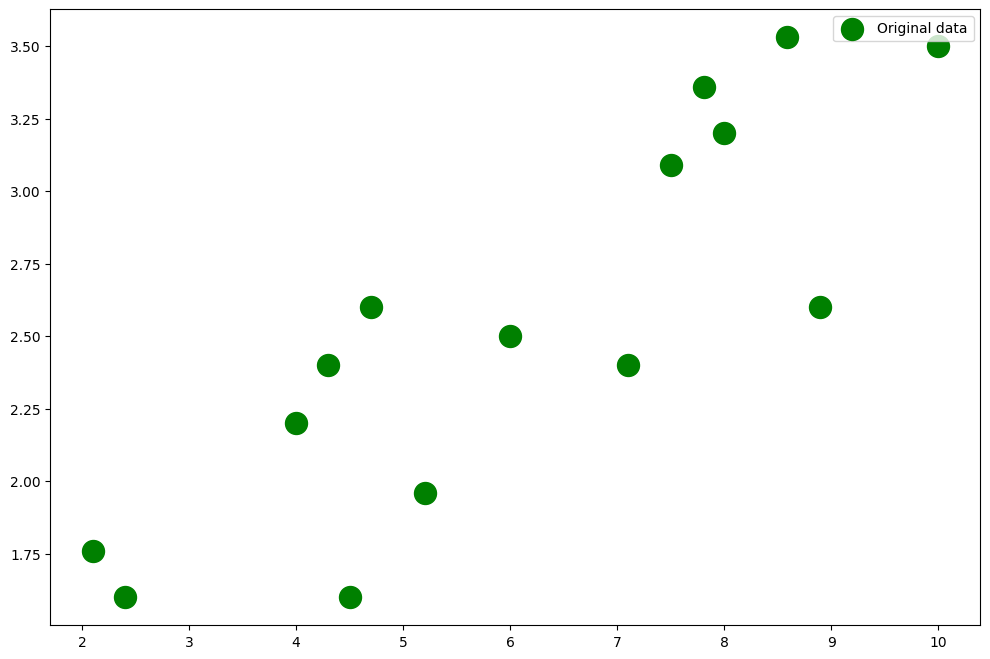

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1

In [7]:
w1 = torch.rand(input_size,
                hidden_size,
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [8]:
w2 = torch.rand(hidden_size,
                output_size,
                requires_grad=True)
w2.shape

torch.Size([1, 1])

In [9]:
learning_rate = 1e-6

In [29]:
for it in range(1, 3000):

    # perform forward pass through NN with a single linear neuron (no activiation function)
    y_pred = X_train.mm(w1).mm(w2)
    # Mean square error loss for linear regression
    loss = (y_pred - Y_train).pow(2).sum()

    # For every 50 iterations of training, print out current value of loss
    if it % 50 == 0:
        print(it, loss.item())

    # backward pass to calculate gradients for model parameters
    loss.backward()

    # tweak model parameters
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4.277945518493652
100 4.257535934448242
150 4.239370822906494
200 4.2231950759887695
250 4.208786964416504
300 4.195948123931885
350 4.184504985809326
400 4.1743059158325195
450 4.165211200714111
500 4.157100677490234
550 4.149866104125977
600 4.143409252166748
650 4.137648105621338
700 4.132505416870117
750 4.127915382385254
800 4.12381649017334
850 4.120156288146973
900 4.116887092590332
950 4.113967418670654
1000 4.111360549926758
1050 4.109029769897461
1100 4.10694694519043
1150 4.105087757110596
1200 4.103423118591309
1250 4.1019368171691895
1300 4.100607872009277
1350 4.099419593811035
1400 4.098358631134033
1450 4.097407817840576
1500 4.096559524536133
1550 4.095799922943115
1600 4.095120429992676
1650 4.0945143699646
1700 4.093970775604248
1750 4.093485355377197
1800 4.093050479888916
1850 4.092662334442139
1900 4.09231424331665
1950 4.092004299163818
2000 4.091724872589111
2050 4.0914764404296875
2100 4.091254711151123
2150 4.0910539627075195
2200 4.090877056121826
2250 4.0

In [30]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.5063]], requires_grad=True)
w2:  tensor([[0.7847]], requires_grad=True)


In [31]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [32]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8672],
        [0.9535],
        [2.9796],
        [2.8207],
        [1.7083],
        [3.1051],
        [3.5358],
        [2.0659],
        [3.4126],
        [0.8343],
        [3.1782],
        [3.9728],
        [1.7878],
        [2.3837],
        [1.5891]], grad_fn=<MmBackward0>)

In [33]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8672168 ],
       [0.95347244],
       [2.9796014 ],
       [2.8206892 ],
       [1.7083048 ],
       [3.1051419 ],
       [3.5357935 ],
       [2.065857  ],
       [3.4126365 ],
       [0.83428836],
       [3.1782413 ],
       [3.9728017 ],
       [1.7877607 ],
       [2.383681  ],
       [1.5891206 ]], dtype=float32)

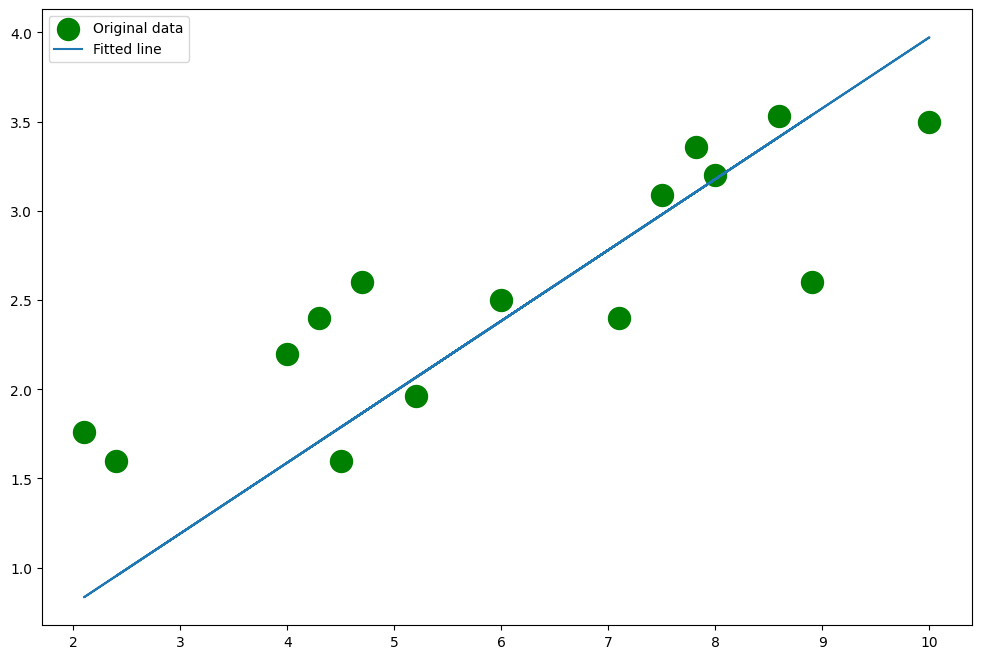

In [34]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()